<a href="https://colab.research.google.com/github/Haoyanz/Project-in-AI/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from glob import glob
import cv2
import os
import pandas as pd

%matplotlib inline

Using TensorFlow backend.


In [0]:
# path to model and data
path2model = '/content/drive/My Drive/'
path2test = '/content/test/'

# specify labels and class names
labels = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

col = {'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c3': 'texting - left',
'c4': 'talking on the phone - left',
'c5': 'operating the radio',
'c6': 'drinking',
'c7': 'reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'}

In [0]:
# load the models
model_alexnet = keras.models.load_model(path2model+'alexnet_model.h5')

In [5]:
model_alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)        

In [58]:
downloaded_vgg_model = keras.applications.vgg16.VGG16()
model_vgg = Sequential()

# copy every layer except the predictions layer
for layer in downloaded_vgg_model.layers[:-1]:
  model_vgg.add(layer)

# make weights fixed since these layers are already fine-tuned
for layer in model_vgg.layers:
  layer.trainable = False

# add our own layer
model_vgg.add(Dense(10))
model_vgg.add(Activation('softmax'))

# load weights
model_vgg.load_weights('/content/drive/My Drive/vgg16_model.h5')

model_vgg.summary()

553467904/553467096 [==============================] - 34s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
____________________________________________________

In [52]:
# load the test images
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        path2test,
        target_size=(224, 224),
        class_mode=None, 
        color_mode='rgb', 
        shuffle=False)

filenames = test_generator.filenames

Found 10 images belonging to 2 classes.


In [59]:
# predict on sample test data
predictions_alexnet = model_alexnet.predict_generator(test_generator, verbose=1)
predicted_class_indices_alexnet = np.argmax(predictions_alexnet, axis=1)
predicted_class_alexnet = [labels[k]+':'+col[labels[k]] for k in predicted_class_indices_alexnet]

predictions_vgg = model_vgg.predict_generator(test_generator, verbose=1)
predicted_class_indices_vgg = np.argmax(predictions_vgg, axis=1)
predicted_class_vgg = [labels[k]+':'+col[labels[k]] for k in predicted_class_indices_vgg]

1/1 [==============================] - 5s 5s/step


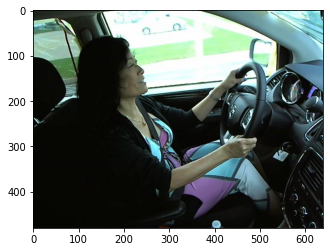

AlexNet Model prediction:  c0:safe driving
VGG-16 Model prediction:  c0:safe driving



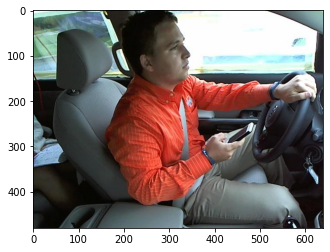

AlexNet Model prediction:  c8:hair and makeup
VGG-16 Model prediction:  c1:texting - right



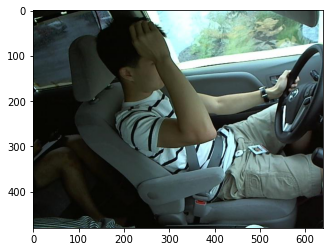

AlexNet Model prediction:  c8:hair and makeup
VGG-16 Model prediction:  c2:talking on the phone - right



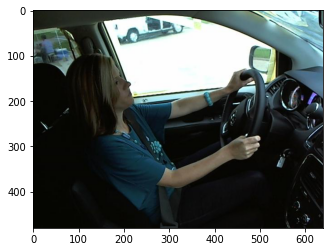

AlexNet Model prediction:  c0:safe driving
VGG-16 Model prediction:  c0:safe driving



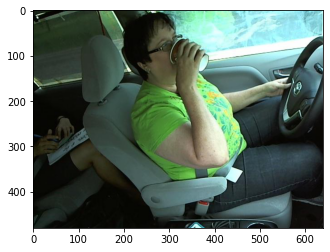

AlexNet Model prediction:  c8:hair and makeup
VGG-16 Model prediction:  c8:hair and makeup



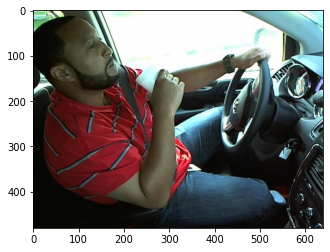

AlexNet Model prediction:  c6:drinking
VGG-16 Model prediction:  c8:hair and makeup



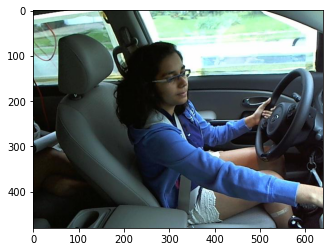

AlexNet Model prediction:  c5:operating the radio
VGG-16 Model prediction:  c5:operating the radio



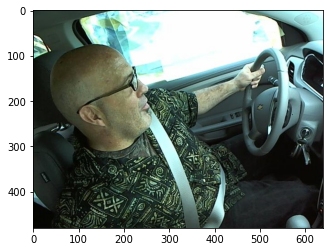

AlexNet Model prediction:  c7:reaching behind
VGG-16 Model prediction:  c2:talking on the phone - right



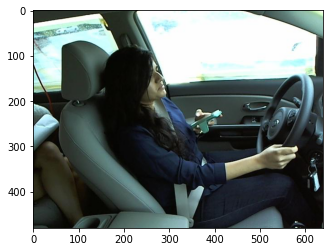

AlexNet Model prediction:  c3:texting - left
VGG-16 Model prediction:  c3:texting - left



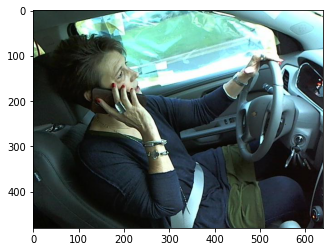

AlexNet Model prediction:  c2:talking on the phone - right
VGG-16 Model prediction:  c2:talking on the phone - right



In [60]:
for i in range(10):

  path = path2test+filenames[i]
  image = plt.imread(path)
  plt.imshow(image)
  plt.show()
  print('AlexNet Model prediction: ',predicted_class_alexnet[i])
  print('VGG-16 Model prediction: ',predicted_class_vgg[i])
  print()